### Straddle, Strangle & Calendar Sensitivity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pricing import BlackScholesMerton
from configuration import OptionConfigurationBuilder

### Straddle

In [2]:
call_configuration = OptionConfigurationBuilder(
    kind='call',
    strike=100,
    dividend_yield=0,
    risk_free_rate=0
)

put_configuration = OptionConfigurationBuilder(
    kind='put',
    strike=100,
    dividend_yield=0,
    risk_free_rate=0
)

In [3]:
price = pd.DataFrame()
delta, gamma, vega, theta, rho = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame() 

for maturity, sigma in ((252, 0.2), (252, 0.05), (126, 0.2)):
    for spot in range(20, 190):
        
        # Configuration --------------------------------------
        
        call_configuration.maturity = maturity
        put_configuration.maturity = maturity
        call_configuration.sigma = sigma
        put_configuration.sigma = sigma
        call_configuration.spot = spot
        put_configuration.spot = spot

        # Option  --------------------------------------------

        call = BlackScholesMerton(call_configuration)
        put = BlackScholesMerton(put_configuration)
        straddle = call + put

        # Retrieve Result ------------------------------------
        
        price.loc[spot, f"maturity {maturity} sigma {sigma}"] = straddle.price()
        delta.loc[spot, f"maturity {maturity} sigma {sigma}"] = straddle.delta()
        gamma.loc[spot, f"maturity {maturity} sigma {sigma}"] = straddle.gamma()
        vega.loc[spot, f"maturity {maturity} sigma {sigma}"] = straddle.vega()
        theta.loc[spot, f"maturity {maturity} sigma {sigma}"] = straddle.theta()
        rho.loc[spot, f"maturity {maturity} sigma {sigma}"] = straddle.rho()

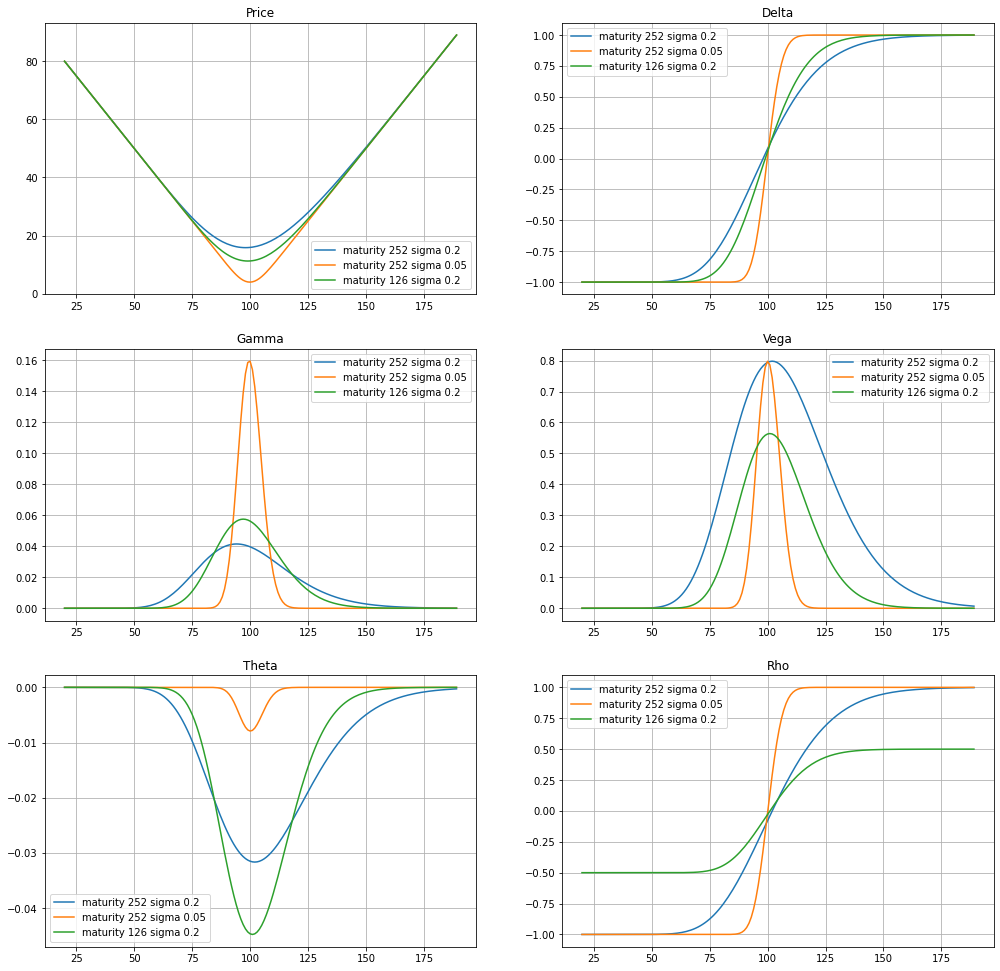

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=2)
price.plot(ax=axes[0, 0], title='Price', grid=True, legend=True)
delta.plot(ax=axes[0, 1], title='Delta', grid=True, legend=True)
gamma.plot(ax=axes[1, 0], title='Gamma', grid=True, legend=True)
vega.plot(ax=axes[1, 1], title='Vega', grid=True, legend=True)
theta.plot(ax=axes[2, 0], title='Theta', grid=True, legend=True)
rho.plot(ax=axes[2, 1], title='Rho', grid=True, legend=True)
fig.set_figheight(17)
fig.set_figwidth(17);

### Strangle

In [5]:
call_configuration = OptionConfigurationBuilder(
    kind='call',
    strike=120,
    dividend_yield=0,
    risk_free_rate=0
)

put_configuration = OptionConfigurationBuilder(
    kind='put',
    strike=80,
    dividend_yield=0,
    risk_free_rate=0
)

In [6]:
price = pd.DataFrame()
delta, gamma, vega, theta, rho = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame() 

for maturity, sigma in ((252, 0.2), (252, 0.05), (126, 0.2)):
    for spot in range(20, 190):
        
        # Configuration --------------------------------------
        
        call_configuration.maturity = maturity
        put_configuration.maturity = maturity
        call_configuration.sigma = sigma
        put_configuration.sigma = sigma
        call_configuration.spot = spot
        put_configuration.spot = spot

        # Option  --------------------------------------------

        call = BlackScholesMerton(call_configuration)
        put = BlackScholesMerton(put_configuration)
        strangle = call + put

        # Retrieve Result ------------------------------------
        
        price.loc[spot, f"maturity {maturity} sigma {sigma}"] = strangle.price()
        delta.loc[spot, f"maturity {maturity} sigma {sigma}"] = strangle.delta()
        gamma.loc[spot, f"maturity {maturity} sigma {sigma}"] = strangle.gamma()
        vega.loc[spot, f"maturity {maturity} sigma {sigma}"] = strangle.vega()
        theta.loc[spot, f"maturity {maturity} sigma {sigma}"] = strangle.theta()
        rho.loc[spot, f"maturity {maturity} sigma {sigma}"] = strangle.rho()

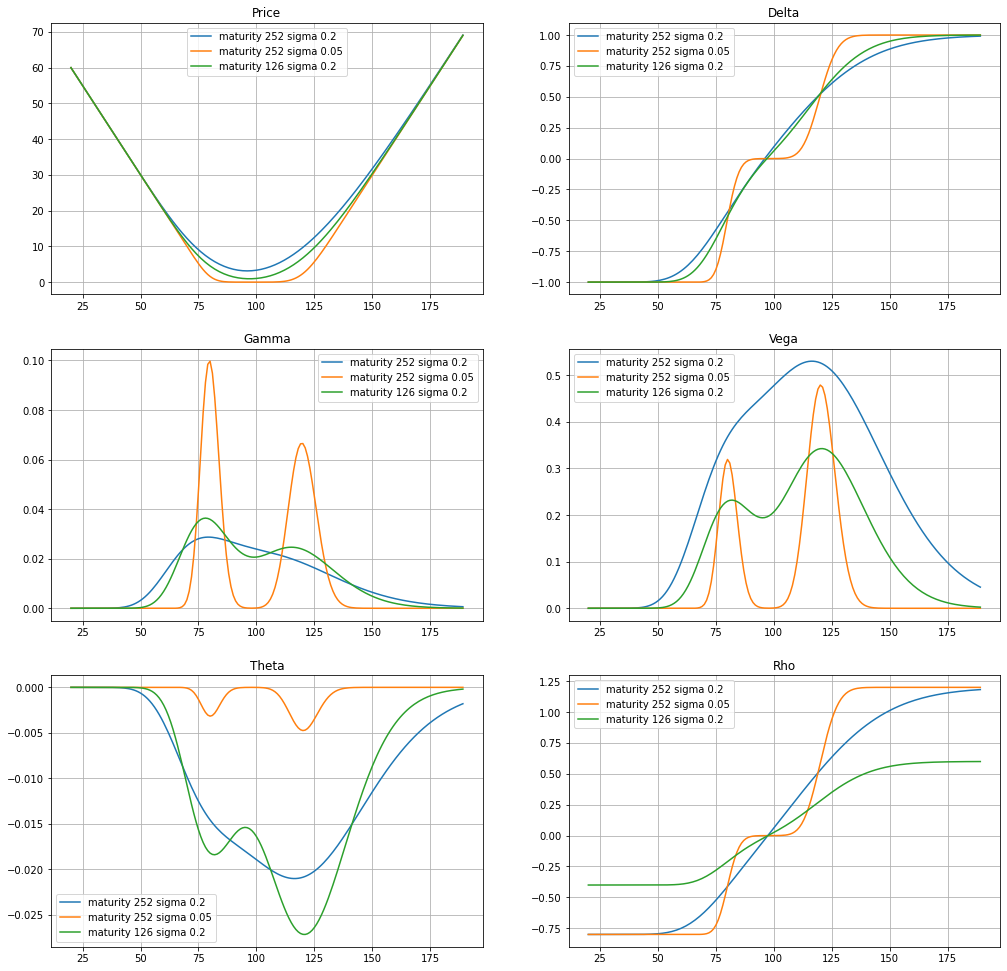

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2)
price.plot(ax=axes[0, 0], title='Price', grid=True, legend=True)
delta.plot(ax=axes[0, 1], title='Delta', grid=True, legend=True)
gamma.plot(ax=axes[1, 0], title='Gamma', grid=True, legend=True)
vega.plot(ax=axes[1, 1], title='Vega', grid=True, legend=True)
theta.plot(ax=axes[2, 0], title='Theta', grid=True, legend=True)
rho.plot(ax=axes[2, 1], title='Rho', grid=True, legend=True)
fig.set_figheight(17)
fig.set_figwidth(17);

### Calendar

In [8]:
call_configuration = OptionConfigurationBuilder(
    kind='call',
    strike=100,
    dividend_yield=0,
    risk_free_rate=0
)

put_configuration = OptionConfigurationBuilder(
    kind='put',
    strike=100,
    dividend_yield=0,
    risk_free_rate=0
)

In [9]:
price = pd.DataFrame()
delta, gamma, vega, theta, rho = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame() 

for maturity, sigma in ((252, 0.2), (252, 0.05), (126, 0.2)):
    for spot in range(20, 190):
        
        # Configuration --------------------------------------
        
        call_configuration.maturity = maturity
        put_configuration.maturity = maturity - 30
        call_configuration.sigma = sigma
        put_configuration.sigma = sigma
        call_configuration.spot = spot
        put_configuration.spot = spot

        # Option  --------------------------------------------

        call = BlackScholesMerton(call_configuration)
        put = BlackScholesMerton(put_configuration)
        calendar = call - put

        # Retrieve Result ------------------------------------
        
        price.loc[spot, f"maturity {maturity} sigma {sigma}"] = calendar.price()
        delta.loc[spot, f"maturity {maturity} sigma {sigma}"] = calendar.delta()
        gamma.loc[spot, f"maturity {maturity} sigma {sigma}"] = calendar.gamma()
        vega.loc[spot, f"maturity {maturity} sigma {sigma}"] = calendar.vega()
        theta.loc[spot, f"maturity {maturity} sigma {sigma}"] = calendar.theta()
        rho.loc[spot, f"maturity {maturity} sigma {sigma}"] = calendar.rho()

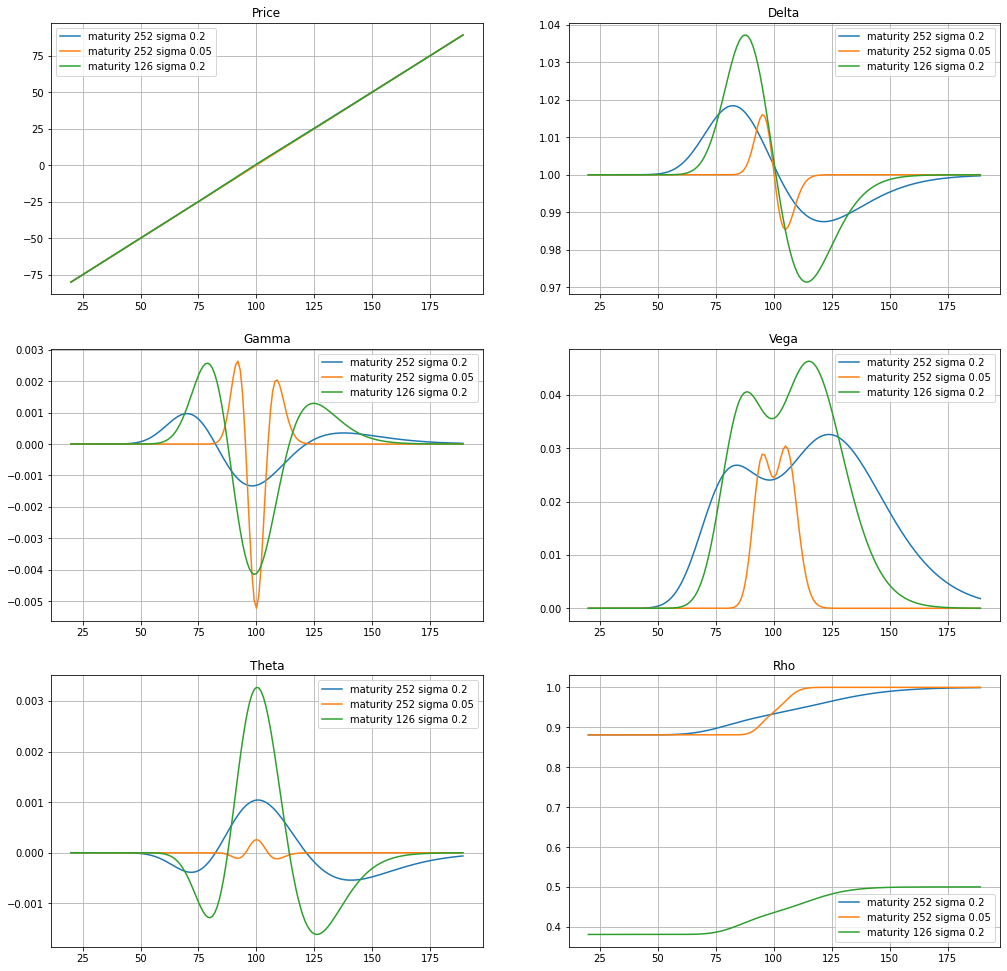

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2)
price.plot(ax=axes[0, 0], title='Price', grid=True, legend=True)
delta.plot(ax=axes[0, 1], title='Delta', grid=True, legend=True)
gamma.plot(ax=axes[1, 0], title='Gamma', grid=True, legend=True)
vega.plot(ax=axes[1, 1], title='Vega', grid=True, legend=True)
theta.plot(ax=axes[2, 0], title='Theta', grid=True, legend=True)
rho.plot(ax=axes[2, 1], title='Rho', grid=True, legend=True)
fig.set_figheight(17)
fig.set_figwidth(17);